# CMSC478 - Assignment 0: Tech Setup and Getting Started with ML

## Instructor: Fereydoon Vafaei

*Type your name and ID here*

## Overview and Learning Objectives

This assignment prepares you for the upcoming assignments to make sure that you have setup the frameworks properly. It also provides some interesting resources (a few articles and videos) to get started with the ML world.

<b>Note</b>: You must download this notebook as .ipynb file, complete it on your own computer (do NOT run it on colab), and then submit the completed notebook as an .ipynb file to Blackboard.

# Part 1 - Python Setup

In <b>Part 1</b> of this Jupyter Notebook, you should run the following cell and make sure that your Python version is correct. Depending on what OS you're using, your output might be slightly different but the Python version must be 3.5 or higher.

In [1]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


> Next, run the following cell which is an example from [matplotlib documentstion](https://matplotlib.org/stable/gallery/index.html).

C:\Users\benth\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


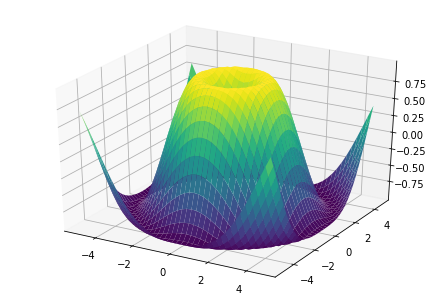

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

>Next, run the following classifier comparison example from [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py).

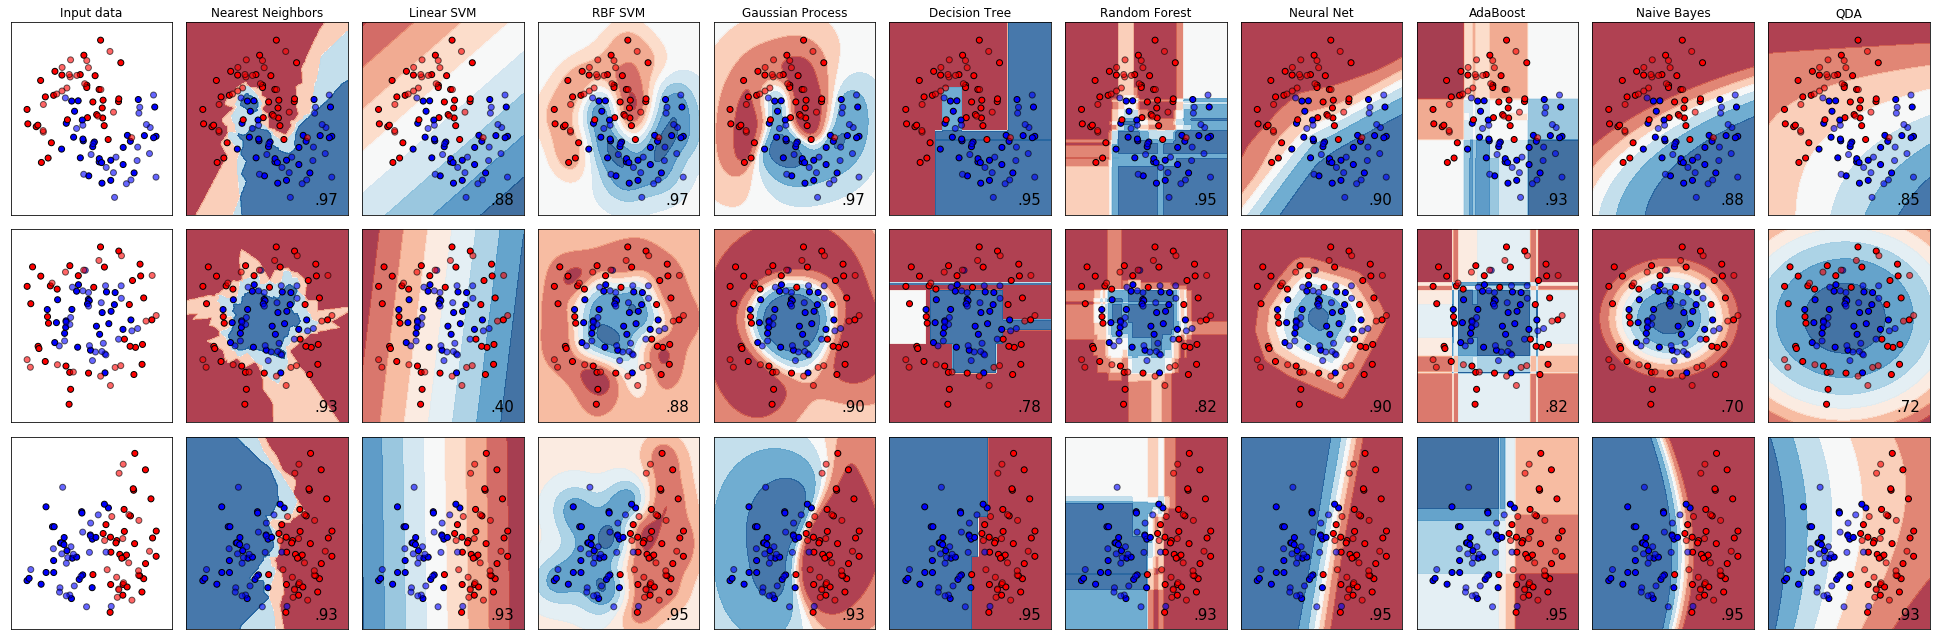

In [4]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

## Part 2 - GAN Talk by Ian Goodfellow

In Part 2, watch the first 10 minutes of [Ian Goodfellow's talk](https://www.youtube.com/watch?v=sucqskXRkss) - the author of the [Deep Learning textbook](http://www.deeplearningbook.org/) - at ICLR-2019 conference where he discusses the recent advances in Adversarial Machine Learning. Don't worry if you don't fully understand what he explains. Generative Adversarial Network (GAN) is an advanced topic, and we've just started the basics of ML! Feel free to watch the entire talk.

Summarize your understanding of the first 10 minutes in a few sentences (at least a paragraph) HERE:

The video has Ian Goodfellow presenting a overview of Adversarial Machine Learning. Unlike traditional Machine learning where the goal is to optimize the cost function, In Adversarial Machine Learning instead of trying to optimize, we use game theory in that there are two algorithms that are pitted against each other, like two players in a game playing against each other. The two algoithm has opposing goals and so as the one algorithm trys to minimize the cost function the other trys to maximize it. So The two algorithms fight to find the best awnser. There is a Equalribium that the two can reach an when it hapens it is thought as the solution of the problem. The video also explains how Adversarial machine learning can be applyed to diffrent Machine learning Research Topics. in the first 10 minutes goodfellow goes into Generative Adversarial Machine Learning. In one of the presented example, what happens is that there are two Models one that attempts to generate Realisitc images, while the other discriminator model trys determines whether the generated image is real or fake. at the same time the discriminator model is trained and learns to recognize the real images from fakes. The two models work together to create Realisic looking images. another application is that it is able to make it possable to train models with less supevision, In the presented example the model is able to take a day time recording of a car driving, and generate it into a night time version of the recording allowing the model to then also train on that generated night time recording. This allows for easier training. 

## Part 3 - Twitter Investigation

Read the following article from BBC:

https://www.bbc.com/news/technology-54234822

Summarize the article in at least a paragraph in the following cell. Your summary should include the twitter investigation, what users found, what Zehan Wang found, and what a US government study about facial recognition suggested. DO NOT COPY/PASTE the article sentences, as it would be considered as plagiarism, and will be reported as academic misconduct.

Your summary goes HERE:

The article talks about racial bias in twitters image previews, Initaly its users found that when given an image with one white male and one black the image cropping algorithm would perfer to crop it in such a way that the white male would be more visable. Twitter responded by saying that they did tests for bias before shipping the algorithm but that clearly there was still improvments to be made. Zehan Wang an engineering lead explained that tests on the algorithm had found no significant bias between gender or race, but that they would review that study again. A U.S. Goverment Study suggested that facial recognition algorithms were not as accurate in identifying other races face than white onces. 

## Part 4 - Computer Vision

Read the following article: ["Understanding the differences between biological and computer vision"](https://bdtechtalks.com/2021/05/10/biological-computer-vision/). Summarize the following FOUR key takeaways from the article based on the book: [Biological and Computer Vision](https://www.cambridge.org/core/books/biological-and-computer-vision/BB7E68A69AFE7A322F68F3C4A297F3CF). Your summary should include ALL of the following FOUR differences:
- Hardware differences
- Architecture differences
- Goal differences
- Integration differences

DO NOT COPY/PASTE the article sentences, as it would be considered as plagiarism, and will be reported as academic misconduct.

Your summary goes HERE:

The Hardware differences verses biological is that biological vision runs on a large network of organic neurons thats eveoled over millions of years of evolution. where as hardware runs on electronic chips composed of transistors. These neurons and cells in biological vision also has many unnecessary parts that Hardware wouldn't need, Hardware has no need for proteins, cytoplasm and complex geometries. So theres also a lot in biological Vision that can be abstracted away when trying to translate it into hardware. But studying Biological Vision can still help us understand and inspire to build better algrothims. 

biological vision also differs in Architecture, The brain has diffrent layers where it prosses diffrent things and is then fed to other areas and back. standard Neural netwoks are one way, it feeds data in only in one direction. There are methods to feed data back like backpropagation but it is computationally expensive and only used in the training stage. Also Each of the brain regions contain six layers, but its still unclear how those layers should be translated into nerual networks.

Biological vision has a lot of flexablity, its able to acomplish many tasks simotaniously, where as computer vision is specalized towards accomplishing one goal, it does not have the flexability that biological vision has.

The body uses Biological vison along with other sensory inputs like smell, sound, as well as logic, and commonsense knowledge. current architectures are specalized towrds one task and being able to fully integrate all sensory inputs as well as contextual knowlage is a big task that we currently have no architecture to do this.




## Part 5 - Semi-Supervised Learning

Read the following article: ["What is semi-supervised Machine Learning?"](https://bdtechtalks.com/2021/01/04/semi-supervised-machine-learning/) and summarize the article.

Your summary must briefly explain ALL the techniques mentioned in the article and should also include a summary of the limitations of semi-supervised learning. DO NOT COPY/PASTE the article sentences, as it would be considered as plagiarism, and will be reported as academic misconduct.

Your summary goes HERE:

supervised learning Classification Reqires that the training data is reviewed and have the correct labels, This is where semi-supervised learning can help automate this process.  

One technique is to use a clustering algorithm. Clustering is a unsupervised technique that will group similar data toghter, we can then take those groups of data, label them and use it in a normal supervised classification model. Some limitations to this technique is that classes should be able to be separated using clustering, Otherwise the clustering algorithm wont be able to properly seperate the data.

Another technique is semi-supervised support vector machines(S3VM). S3VM uses the labeled data to determine what the unlabeled data is, and then uses that to futher train the data set. 

and lastly another technique is to train a model on the labeled portion of the data, then you can use that model to determine  the labels for the unlabel part of your data. Once thats done your data set is all labeled and can be used for any supervised classification techniqie. some limitations to the last two technique is that you must have enough labeled data to train the model and the label data should be a good repsentation of the data. 



## Part 6 - Interpolation, Extrapolation and Linearisation

Watch the following video COMPLETELY:

https://www.youtube.com/watch?v=86ib0sfdFtw

Summarize the discussions in the video. Your summary should be at least FIVE paragraphs with the following headlines:

- Interpolation
- Extrapolation
- Linearisation
- Why is it important to distinguish between interpolation and extrapolation?
- Can DL models reason?

Your summary goes HERE:

- **Interpolation**:

Interpolation is when you predict/create data points within the distribution of the data, Interpolation in Machin Learning is that as well. The machine learning algorithm is able to analyzes the data and from that is able to interpolate a range of possable data points within the data distribution, This is what allows the machine learning to generalize and "learn" the data. Because of interpolation machine learning is able to work very well with data that is within the training distribution of the problem, But wont do well if the data is outside the distribution or if the problem is not interpolable. In high dimensions the geometry of the training data distribution can be thought of as a "convex hull" If a test data point falls within the convex hull then the model is interpolating but if it falls outside the convex hull the model is extrapolating, And Model performance starts to degrade rapidly the further away you are from the convex hull. The Video explaines that the even though the intuition of interpolation that people have works well, In High dimensions the mathmatical definition is not useful, its explained that in high dimensions the current definition of interpolation and extrapolation that uses the concept of a convex hull is too rigid to provided any meaningful intuition of of how machine learning works in high dimensions. The a machine learning algorithm can interpolate data that falls within this convex hull however the problem is that the probability that your test data falls within the convex hull of your training data is extremely low past a certain number of dimensions. And even if it does fall within the convex hull if its in a region that not densely sampled and theres not much nearby data points, then your model may not accurately aproximate the data. So inside or outside the convex hull isn't as important as much as proximity to the data. Randall Balestriero explains that for high dimensional model we should change the mathematical definition of interpolation. When asked what he would redefine interpolation as. Randall Balestriero expains that it is very task dependant, and that he tinks there is not general definition that would fit all scenarios. One idea for the definition of exrapolation was brought up was if Instead of requiring at least one dimesion to be out side of the trainging data dimentions and therefore outside of the convex hull to be considered extrapolation. what if the requierment was that all dimesions had to be outsided of convex hull to be consided extrapolation. In this case then the probability that your test data falls in none of the dimensions of your training data is lower, and therefore the hypothisis of LeCuns paper could be somewhat flipped to say machine lerning is interpolating instead of Extrapolation.

 
- **Extrapolation**:

Extrapolation happens when the model has to make a prediction based on test data that falls ouside of the training data distribution. The problem is that since it falls outside of the training data distribution the model has no data to interpolate from and has a harder time generalizing and making its prediciton. So making machine models work with extrapolation requires the introduction of biases to enforce the model to follow them when its test data is outside the training data distribution and has no data to interpolate from. but the challenge is achieving the correct balance of bias, having the correct bias is beneficial but having the wrong one is detrimental. In high dimensions the geometry of the training data distribution can be thought of as a "convex hull" If a test data point falls within the convex hull then the model is interpolating but if it falls outside the convex hull the model is extrapolating. And Model performance starts to degrade rapidly the further away you are from the convex hull. In the video Tim Scarfe explaines that high dimensional(>100) Neural networks are almost always extrapolating. This is due to the high dimensions in these models, In High dimensionality the volume that these convex hulls cover is very low and the probability of the test data falling within the convex hull is almost zero in high dimensional models and therefore are almost always extrapolating. When dimensions increase the volume of the space becomes vast and the data become sparse. This sparseness is a problem, The amount of data needed grows exponentially with the dimensionality, So the probability of a new data point being within the convex hull decreases exponentially with the increase of dimensions. The video claims that our definition of Extrapolation is broken and and will never work in high dimensions and is why we have many tricks to reduce statistical and apoximation complexity of problems.


- **Linearisation**:

Randall Balestriero in his spline theory paper He proposes that neural networks can be rewritten as compositions of piece wise linear functions arranged in polyhedra cells in the input space. The neural networks are esentually chopping up the input space into many polyhedra cells, and each face of these polyhedra cells can correspond to different hyperplanes that have been contributed to the input space by the diffrent layers of the neural network, Each layer of a neural networks adds a set of hyperplanes, and the polyhedra cells act to toggle the hyperplanes depending on if the input fall into one of these cells. Since each face of the polyhedra cells could be made up of different hyperplanes that where contributed by the various layers of the neural network, the polyhedra cells are the results of multiple layers contributing its data together to create this cell and any hyperplane can be reused by any neurons that can reach it via the cells faces. When an input is given it will fall into one of these polyhedra cells and be transformed as a output using all the hyper plane data that intersect at the polyhedra cell. because of these diffrent hyperplanes activations the video hypotisises that instead of having only one latent space of data, there actually multiple input specific latent spaces at each layer. These cells are made up of linear functions but there are so many of them that when visualing it can appear to be making smooth seperations and classifications of the data. 


- **Why is it important to distinguish between interpolation and extrapolation?**

In the video Tim Scarfe explaines that its important distinguish interpolation vs extrapolation because of the implications that extrapolation has for generalization in deep learning. The performace of machine learning models on test data deteriorate rapidly the futher away you go from the training data distribution. And for high dimensional models, Yann LeCun's "Convex Hull" definition means that high demensional models will almost always be extrapolating due to the low probability of your test data being within the convex hull. But Yann LeCun expains that this convex hull definition is too ridgid. There are diffrent ways that you could define interpolation and extrapolation in high dimesions. But Randall Balestriero explains that the key is to find a meaningful definition for your model, so that it gives you a good intuition on the generalization performance of your model. If you detect your model is extrapolating but it still performs well, then your definition doesn't have much practical use. you want your definition to correlate with the generalization performace of your model, this way it gives you a meaningful insight.



- **Can DL models reason?**

Yann LeCun explains that at the moment no, developing deep learning models with the ablity to reason is one of that main challenges for the next decades. And the big question is how to get machines to reason in ways that are compatible with deel learning. he states that many of the criticisms of deep learning is with supervise learning which are specialized for one task and don't perfom well when we attempt to go out side that task, but states that this is not a limitation for unsupervised learning. He has no doubt that they will eventually. 





##  Grading

- Assignment-0 has 35 points. Parts 1-5 have 5 points each. Part 6 has 10 points.

- Grading will be based on completeness and correctness of all the required tasks, prompts and summaries.

- <b>Note:</b> Incomplete summaries will get ZERO. Copy/pasted summaries will get ZERO and will be reported as academic misconduct.

- Points will be deducted if you have mistakes in naming the files.

## Submission

Name your completed notebook ```Lastname-A0.ipynb```.  

Submit the .ipynb file using the ```Assignment-0``` link on Blackboard.
  
<font color=red><b>Due Date: Thursday Feb 10, 11:59PM</b></font>